# Series

In [1]:
import pandas as pd
from IPython.display import Image, YouTubeVideo

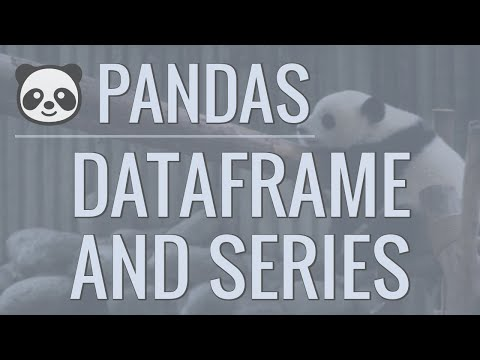

In [2]:
YouTubeVideo(id='zmdjNSmRXF4', width=900, height=400)

In data science, we very often have labels that are associated with the data that we manipulate. And we would like to be able to put labels on the tables we handle. This is exactly what pandas can do.
Let's look at an example. Here I have an array that represents ages for example, and I would like to be able to associate each entry in this array with a first name.

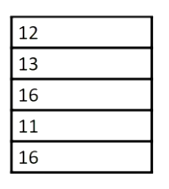

In [4]:
Image('serie.png')

Well, in pandas, I can do it by adding labels which are represented by an object called an index. And this one-dimensional object is called in pandas a Series.

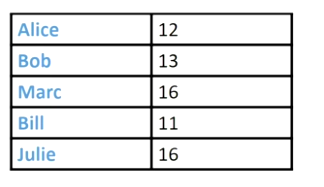

In [5]:
Image('serie1.png')

Now, imagine that I have a two-dimensional array, where the first column represents ages and the second column represents sizes, I would like to be able to add labels on the columns, Age and Height, and I would like to be able to add labels on the lines, which correspond to first names. 

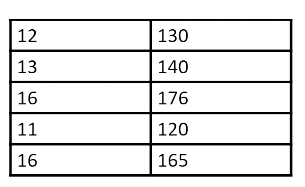

In [6]:
Image('df.png')

Again, this is what pandas does with a data structure called the DataFrame. 

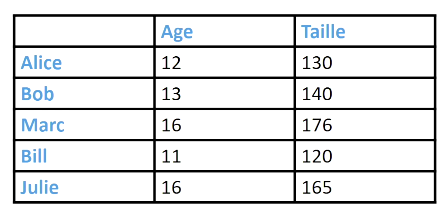

In [7]:
Image('df1.png')

So in summary, there are two major data structures in pandas, **`Series`**, for one-dimensional data, and **` DataFrames`**, for two-dimensional data. Much of the complexity of pandas comes from mastering this notion of **index**. An index is an object which is very powerful and which has two major characteristics. It allows optimized access to the data in the table, and it also allows a notion of automatic alignment during operations.Let's take an example, imagine that you have to add two DataFrames, the addition operation will **only apply** to elements that have exactly the **same label**.

An index is an immutable object that is on the border between `set` and `list`. An index contains items that are hasable, like a set, and it's sliceable, like a list. In addition, the index will define an order relationship on the items that are stored, and it may contain duplicate items. An index on a Series will provide the Series with an interface that is both a list interface and a dictionary interface. In practice, we very rarely create our own indexes. In fact, the indexes will be created automatically when we import our data. And pandas supports a wide variety of data formats, both import and export. In pandas, you can import data in `csv` format, in `json` format, in `html`, `excel`, `sql` or `pickle` format.

## Creating a Series

Create a series and pass it a list of items, 20, 30, 40, 50, and pass it an index; the index is going to be given names, for example, Eve, Bill, Liz and Bob.

In [8]:
s = pd.Series([20, 30, 40, 50], index=['eve', 'bill', 'liz', 'bob'])
s

eve     20
bill    30
liz     40
bob     50
dtype: int64

In this series, I can retrieve the values and so it will output me the NumPy array corresponding to the values hosted by this series.

In [9]:
s.values

array([20, 30, 40, 50])

I can access the index with the index attribute, and so it's going to return me the index object that is in this series.

In [10]:
s.index

Index(['eve', 'bill', 'liz', 'bob'], dtype='object')

And then I can access the elements of that object.

In [11]:
s.loc['eve']

20

I write `s.loc['eve']` This will allow me to access the value corresponding to the label eve. So you notice here that I used the loc attribute; it is very important to always use this attribute. You will see in some documentation or on the internet that it is possible to access the value stored by eve directly in this way `s['eve']`; but this notation has many side effects. 

So I can access eve but I can also make a slice; I can go for example from eve to liz. Let's look at the result and I get the values ranging from eve to liz.

In [12]:
s.loc['eve': 'liz']

eve     20
bill    30
liz     40
dtype: int64

There is a noticeable difference here with the slice you usually know is that here I make a slice of i colon j but I go from i to j inclusive, so I go from eve to liz included, the right terminal is indeed a terminal that is taken into account and which is included. As we can make slices on the labels, you are probably wondering what is the order relation that I have on my labels. This order relation is determined when I create my Series by the order in which I will specify my labels when I define my index.

Let's look at an example, I will take the previous case, so I take this series, which I copy below, but now I'm going to swap bill and liz. I am running this series. I recreate the same slice as the one above, s.loc from eve to liz and what is the result I get? Now, I'm fine from eve to liz but with an order relation which is defined by the order of the elements when creating my index. 

In [13]:
s = pd.Series([20, 30, 40, 50], index=['eve', 'liz', 'bill', 'bob'])
s.loc['eve':'liz']

eve    20
liz    30
dtype: int64

However, there is one case where **slicing** doesn't work. Slicing on labels will not be defined if you have **duplicate** labels and in addition your index has not been **sorted**. So in other words, if you don't have a duplicate label, slicing will still work, and if your index has been sorted, slicing will still work. In practice, we do not control the labels since the labels are given by our dataset. However, you can still sort your index. Therefore, it is recommended that you always do this. When you `sort` the `index`, you are guaranteed that the slicing will always work, and in addition, sorting the index significantly improves the performance of that index. Let's take an example:

In [14]:
pets = ['dog', 'cat', 'cat', 'dog', 'fish']
owner = ['eve',   'bob',  'eve',  'bill',  'liz']

In [15]:
s = pd.Series(pets, index=owner)
s

eve      dog
bob      cat
eve      cat
bill     dog
liz     fish
dtype: object

So now let's try to do some slicing on this streak. I will make slicing from eve to liz. So now what's going to happen? 

In [16]:
s.loc['eve': 'liz']

KeyError: "Cannot get left slice bound for non-unique label: 'eve'"

I have a KeyError exception: Cannot get left slice bound for non-unique label: "eve". My label eve has been duplicated, I cannot no slicing on it. So how do you solve this problem? It's very simple, you just have to sort the index.

In [17]:
s = s.sort_index()
s.loc['eve':'liz']

eve     dog
eve     cat
liz    fish
dtype: object

Let's look at an example. I'm going to take my series s, and I'm going to get all the items for which the value is dog. I run and I get the series for which the value is dog.

In [19]:
s.loc[s=='dog']

bill    dog
eve     dog
dtype: object

I can obviously do more sophisticated indexing, so I take s equals dog or s equals fish, and so I'm going to grab the list, the series that contains dogs and fish

In [21]:
s.loc[(s=='dog') | (s=='fish')]

bill     dog
eve      dog
liz     fish
dtype: object

And I can end up doing some assignment on this advanced index, and so I can say here that all those who are worth dog or fish are now replaced by other. If I look at my series now, all I have left is a cat, and dog and fish have been replaced by other.

In [22]:
s.loc[(s =='dog') | (s == 'fish')] = 'other'
s

bill    other
bob       cat
eve     other
eve       cat
liz     other
dtype: object

## Index alignement

The notion of index alignment is an extremely important notion when talking about Series in Pandas.
Let's create two series s1 and s2

In [23]:
s1 = pd.Series([1, 2, 3], index=list('abc'))
s2 = pd.Series([5, 6, 7], index=list('acd'))

In [24]:
s1

a    1
b    2
c    3
dtype: int64

In [25]:
s2

a    5
c    6
d    7
dtype: int64

Now let's look at what 'it happens if I do an addition.

In [26]:
s1 + s2

a    6.0
b    NaN
c    9.0
d    NaN
dtype: float64

Pandas will automatically align the labels, i.e. the operation will only be defined for values that have the same label on the left and on the right.So when I miss a value for a given label in one of the two series, the result of the operation will be NaN. You also notice that my two series are series which are int64. And that the result is a float64. Why ? Well because there are operations which are not defined, I have to represent the operation not defined by a NaN, and a limitation of NumPy is that the NaN only exists for floats so everything is converted to float64.

We can obviously control this behavior with the `add` method, but now i can pass an argument which is called `fill_value` and which will consist of saying: if i am missing an element on the left or on the right, i will replace it with a default value. And so here, the default value that we are going to put is 50.

In [27]:
s1.add(s2, fill_value=50)

a     6.0
b    52.0
c     9.0
d    57.0
dtype: float64